In [2]:
import os
import numpy as np
from time import time
from reconstruction.utils import binvox_rw
from reconstruction.utils.plot import plot_vol

In [24]:
folder = '/home/rhermoza/data/3d/3DPotteryDataset/3D Models/'
paths = [os.path.join(folder, f) for f in os.listdir(folder) if f != 'All Models']
files = [os.path.join(i,j) for i in paths for j in os.listdir(i) if j[-4:] == '.obj']


Plotting: /home/rhermoza/data/3d/3DPotteryDataset/3D Models/Lekythos/London D 51.obj


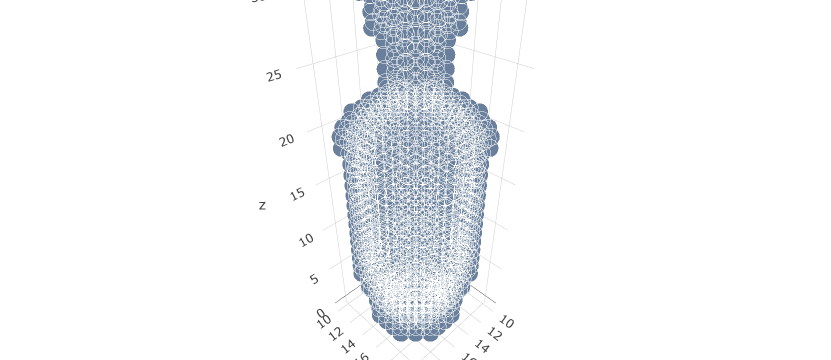

In [26]:
# generate file
file = np.random.choice(files)

def voxels_from_file(file, voxsize=32):
    label = os.path.basename(os.path.dirname(file))
    out_file = file.split('.')[0] + '.binvox'
    file = file.replace(' ', '\ ')
    cmd = f'tools/binvox/binvox -d {voxsize} -cb -e {file}'
            
    if os.path.exists(out_file):
        os.remove(out_file)

    t = os.system(cmd)
    
    if t == 0:
        with open(out_file, 'rb') as f:
            d = binvox_rw.read_as_3d_array(f).data
        
        os.remove(out_file)
        return 1, d, label
    else:
        return 0, None, label

voxels = voxels_from_file(file, 32)
print('\nPlotting:', file)
plot_vol(voxels[1])

In [44]:
import multiprocessing
from concurrent.futures import ThreadPoolExecutor

n_cpu = multiprocessing.cpu_count()

In [82]:
t0 = time()
with ThreadPoolExecutor(max_workers=n_cpu) as executor:
    res = executor.map(voxels_from_file, files)

errors, voxels, labels = zip(*res)
print('%.2fs' % (time() - t0))

11.46s


In [83]:
errors = np.array(errors)
labels = np.array(labels)[errors == 1]
voxels = np.array([voxels[i] for i in np.where(errors == 1)[0]])
voxels.shape, labels.shape

((1007, 32, 32, 32), (1007,))

In [93]:
output = {}
output['train'] = {'labels': labels, 'data': voxels, 'errors': []}
np.save('/home/rhermoza/data/3d/3DPotteryDataset/voxels.npy', output)

In [38]:
output = np.load('/home/rhermoza/data/3d/3DPotteryDataset/voxels.npy').item()
labels = output['train']['labels']
voxels = output['train']['data']

In [39]:
np.unique(labels)

array(['Abstract', 'Alabastron', 'Amphora', 'Aryballos', 'Bowl', 'Dinos',
       'Hydria', 'Kalathos', 'Kantharos', 'Krater', 'Kyathos', 'Kylix',
       'Lagynos', 'Lebes', 'Lekythos', 'Lydion', 'Mastos', 'Modern-Bottle',
       'Modern-Glass', 'Modern-Mug', 'Modern-Vase', 'Mug',
       'Native American - Bottle', 'Native American - Bowl',
       'Native American - Effigy', 'Native American - Jar', 'Nestoris',
       'Oinochoe', 'Other', 'Pelike', 'Picher Shaped', 'Pithoeidi',
       'Pithos', 'Psykter', 'Pyxis', 'Skyphos'],
      dtype='<U24')

1 objects.


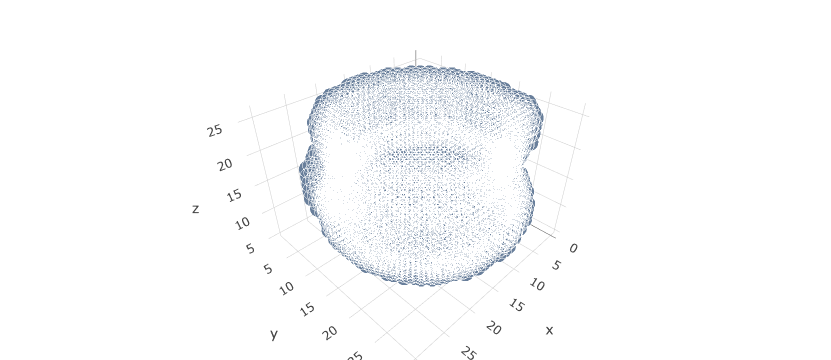

In [42]:
lbl = 'Mug'
sel = voxels[labels == lbl]
print(f'{sel.shape[0]} objects.')
i = np.random.choice(sel.shape[0])
plot_vol(sel[i])

Modern-Vase


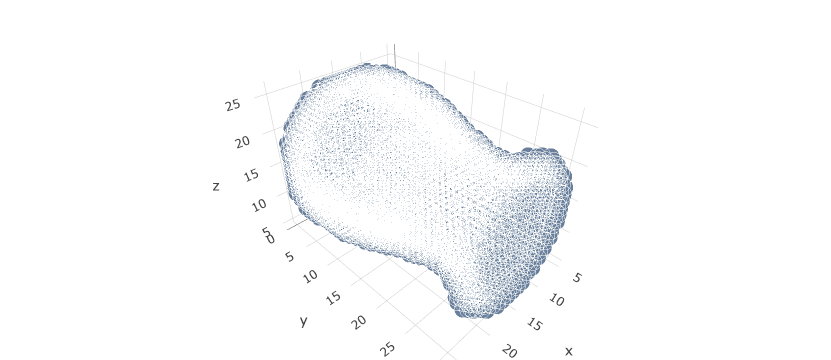

In [100]:
i = np.random.choice(voxels.shape[0])
print(labels[i])
plot_vol(voxels[i])